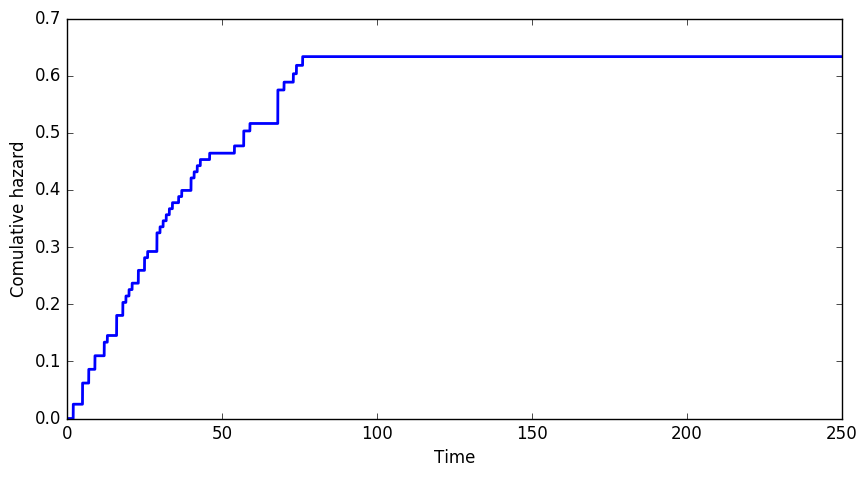

PyObject <matplotlib.text.Text object at 0x7fb9ddd3bb10>

In [22]:
using RandomForest, PyPlot
using RDatasets:dataset

tongue = dataset("KMsurv", "tongue")

time=Array(tongue[2])
event=Array(tongue[3])

#Sort time 
sortedIndeces=unique(map(i->find(x->x==i,time), sort(time)))
indeces=[]
for key in sortedIndeces
    for element in key
        push!(indeces,element)
    end
end

time=sort(time)
event=event[indeces]

surv_1 = treeSurvival()

#Fit survival model
fit!(surv_1, time, event)
# results = evaluate_method(method=forest())

#Predict 
y_1 = predict(surv_1, hcat([0:0.01:250...]))

# Plot the results
fig = figure(figsize=(10,5))
plot([0:0.01:250...], y_1, c="blue", linewidth=2)

xlabel("Time")
ylabel("Comulative hazard")


-------------------------

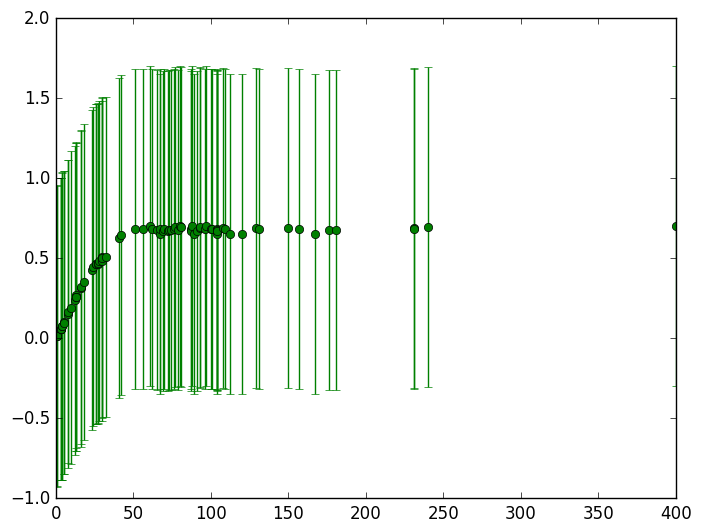

Running experiment
Completed experiment

Survival results
	   MSE	  Corr	 AvMSE	VarMSE	DEOMSE	AEEMSE	 Valid	Region	  Size	 NoIrr	  Time

	0.3839	-0.445	0.3849	 0.001	0.0006	0.0803	 0.975	1.9803	 100.0	 100.0	0.0885

Method

	learningType = RandomForest.Survival()
	modeltype = forest
	notrees = 100
	minleaf = 1
	maxdepth = 0
	randsub = all
	randval = true
	splitsample = 0
	bagging = true
	bagsize = 1.0
	modpred = false
	laplace = false
	confidence = 0.95
	conformal = default

Total time: 0.09 s.


(PyObject <matplotlib.lines.Line2D object at 0x7fb9dcec1fd0>,(PyObject <matplotlib.lines.Line2D object at 0x7fb9dcec17d0>,PyObject <matplotlib.lines.Line2D object at 0x7fb9dcec18d0>),(PyObject <matplotlib.collections.LineCollection object at 0x7fb9dceaae50>,))

In [54]:
using RandomForest, PyPlot
using RDatasets:dataset

tongue = dataset("KMsurv", "tongue")

time=Array(tongue[2])
event=Array(tongue[3])

#Sort time 
sortedIndeces=unique(map(i->find(x->x==i,time), sort(time)))
indeces=[]
for key in sortedIndeces
    for element in key
        push!(indeces,element)
    end
end

time=sort(time)
event=event[indeces]

surv_1 = treeSurvival()

#Fit survival model
fit!(surv_1, time, event)
results = evaluate_method(method=forest())

r1=results["predictions"]

len=length(r1)
y=zeros(len)
conf1=zeros(Array(Float64,len,2))

for i=1:len
    y[i]=r1[i][1]
    conf1[i,1],conf1[i,2]=r1[i][1]-r1[i][2][1],r1[i][2][2]-r1[i][1]
end

#Plot predictions with confidence interval
errorbar(time,y,yerr=transpose(conf1), fmt="o",color="green") 
